#### Import the required libraries

In [1]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
import numpy as np
import random
random.seed(42)
import networkx as nx
import pylab as plt
import zipfile
from pathlib import Path

### extracting initial dataset

In [2]:
initial_dataset = Path("../datasets/Initial_training_data/train_data_whole_merged.csv")
if not initial_dataset.exists():
    with zipfile.ZipFile("../datasets/Initial_training_data.zip","r") as zip_ref:
        zip_ref.extractall("../datasets/Initial_training_data")

###  1. Importing the dataset and the genes present in RHO GDI pathway


###  2. Discretizing the Dataset for simplicity

In [3]:
genes = ['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)','PIP4K2A','RTKN','ECM1','ITGB2','GNA11','GPRC5A','PAK2','CD44','ARHGAP6','ARHGEF19','CDH1','CDH5','CFL2','DLC1','GNG11','PIP5K1B','RHOJ','ERMP1','PAK1','CDC42-IT1','RAC2','ROCK2','LIMK2','DGKZ','DAGLB','PAAF1','PIP','ERMAP','LACTB']
train = pd.read_csv('../datasets/Initial_training_data/train_data_whole_merged.csv')  
key_genes = train[genes]

a = []
for i in key_genes['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)']:
    if i == 'NSCLC':
        a.append(1)
    else:
        a.append(0)
key_genes['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)'] = a

def getdf(NSCLC):
    b = []
    for i in key_genes.columns[1:]:
        m = np.mean(key_genes[i])
        a = []
        for j in key_genes[i]:
            if j>=m:
                a.append(1)
            else:
                a.append(0)
        key_genes[i] = a
        
    key_genes1 = key_genes[key_genes['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)'] == NSCLC]
    
    key_genes1 = key_genes1.drop(['Disease Status (NSCLC: primary tumors; Normal: non-tumor lung tissues)'],axis=1)
        
    return key_genes1

C:\Users\SARANSH\Anaconda3\envs\saransh\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### Input 0 if you want to analyze the probabilities on healthy dataset
### Input 1 if you want to analyze the probabilities on NSCLC dataset

In [4]:
NSCLC_ = int(input("Input 0 if you want to analyze the probabilities on healthy dataset and 1 if you want to analyze on NSCLC dataset"))

Input 0 if you want to analyze the probabilities on healthy dataset and 1 if you want to analyze on NSCLC dataset1


In [5]:
df = getdf(NSCLC_)
df = df.drop(['CDH5'],axis=1)
genes = df.columns

C:\Users\SARANSH\Anaconda3\envs\saransh\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Building the Network for processing

In [6]:
nodes = genes
model = BayesianModel([('GPRC5A','GNA11'),('GNA11','ARHGEF19'),('RTKN','ARHGEF19'),('ITGB2','ARHGEF19'),('ECM1','ITGB2'),('GPRC5A','GNG11'),('CDH1','ARHGEF19'), ('GNG11', 'ARHGEF19'),('DLC1','ARHGEF19'),('ARHGEF19','RHOJ'),
                      ('ARHGAP6','DLC1'),('PAK2','DLC1'),('ERMP1','DLC1'),
                      ('RHOJ','CDC42-IT1'),('CDC42-IT1','PAK1'),('PAK1','LIMK2'),('LIMK2','CFL2'),('RHOJ','RAC2'),('RAC2','PAK1'),
                      ('RHOJ','ROCK2'),('ROCK2','LIMK2'),('RHOJ','DGKZ'),('DAGLB','DGKZ'),('DGKZ','PAAF1'),('PAAF1','PIP5K1B'),
                      ('PIP','PIP5K1B'),('CD44','ERMAP'),('RHOJ','ERMAP'),('ERMAP','LACTB'),('PIP5K1B','PIP4K2A'),('PIP4K2A','ERMAP')])
model.fit(df)
model.get_cpds()

[<TabularCPD representing P(ARHGAP6:2) at 0x23ea76de6c8>,
 <TabularCPD representing P(ARHGEF19:2 | CDH1:2, DLC1:2, GNA11:2, GNG11:2, ITGB2:2, RTKN:2) at 0x23ec46ab708>,
 <TabularCPD representing P(CD44:2) at 0x23ec46ab588>,
 <TabularCPD representing P(CDC42-IT1:2 | RHOJ:2) at 0x23ea76f0408>,
 <TabularCPD representing P(CDH1:2) at 0x23ea76f0848>,
 <TabularCPD representing P(CFL2:2 | LIMK2:2) at 0x23ea76de5c8>,
 <TabularCPD representing P(DAGLB:2) at 0x23ec46ab2c8>,
 <TabularCPD representing P(DGKZ:2 | DAGLB:2, RHOJ:2) at 0x23ec3ef12c8>,
 <TabularCPD representing P(DLC1:2 | ARHGAP6:2, ERMP1:2, PAK2:2) at 0x23ec3ef1148>,
 <TabularCPD representing P(ECM1:2) at 0x23ec3ef1948>,
 <TabularCPD representing P(ERMAP:2 | CD44:2, PIP4K2A:2, RHOJ:2) at 0x23ea76de648>,
 <TabularCPD representing P(ERMP1:2) at 0x23ec3ef1b08>,
 <TabularCPD representing P(GNA11:2 | GPRC5A:2) at 0x23ec3ef1408>,
 <TabularCPD representing P(GNG11:2 | GPRC5A:2) at 0x23ec3ed1b88>,
 <TabularCPD representing P(GPRC5A:2) at 0x23

### Visualize the network in 2D 

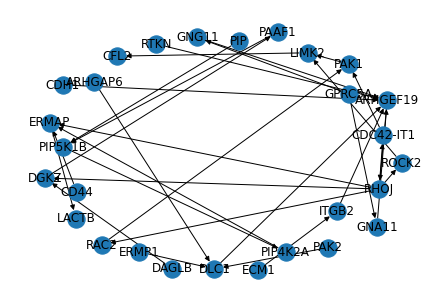

In [7]:
nx.draw(model, with_labels=True)
plt.show()

#### Calculating the probabilities of Genes being upregulated

In [8]:
infer = VariableElimination(model)

for i in df.columns:
    
    print(i)
    
    posterior_diff = infer.query([i])
    
    print(posterior_diff)

Eliminating: DLC1:   0%|                                                                        | 0/27 [00:00<?, ?it/s]


PIP4K2A


Eliminating: DGKZ: 100%|███████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 59.76it/s]

Finding Elimination Order: :   0%|                                                              | 0/27 [00:00<?, ?it/s]

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Eliminating: LACTB:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: PIP4K2A:   0%|                                                                     | 0/27 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: DLC1:  19%|████████

+------------+----------------+
| PIP4K2A    |   phi(PIP4K2A) |
+============+================+
| PIP4K2A(0) |         0.5232 |
+------------+----------------+
| PIP4K2A(1) |         0.4768 |
+------------+----------------+
RTKN




Eliminating: ERMAP:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 42.48it/s]

Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 42.48it/s]

Eliminating: PIP:  19%|████████████                                                     | 5/27 [00:00<00:00, 42.48it/s]

Eliminating: ROCK2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 42.48it/s]

Eliminating: ROCK2:  37%|██████████████████████▉                                       | 10/27 [00:00<00:00, 43.36it/s]

Eliminating: CDH1:  37%|███████████████████████▎                                       | 10/27 [00:00<00:00, 43.36it/s]

Eliminating: PIP5K1B:  37%|██████████████████████▏                                     | 10/27 [00:00<00:00, 43.36it/s]

Eliminating: CFL2:  37%|███████████████████████▎                                       | 10/27 [00:00<00:00, 43.36it/s]

Eliminating: CD44:  37%|██████

+---------+-------------+
| RTKN    |   phi(RTKN) |
+=========+=============+
| RTKN(0) |      0.4584 |
+---------+-------------+
| RTKN(1) |      0.5416 |
+---------+-------------+
ECM1





Eliminating: ERMAP:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 42.49it/s]


Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 42.49it/s]


Eliminating: ITGB2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 35.28it/s]


Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 35.28it/s]


Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 35.28it/s]


Eliminating: CDH1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 35.28it/s]


Eliminating: PIP5K1B:  30%|██████████████████                                           | 8/27 [00:00<00:00, 35.28it/s]


Eliminating: CFL2:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 35.28it/s]


Eliminating: CD44:  3

+---------+-------------+
| ECM1    |   phi(ECM1) |
+=========+=============+
| ECM1(0) |      0.5470 |
+---------+-------------+
| ECM1(1) |      0.4530 |
+---------+-------------+
ITGB2




Eliminating: ARHGAP6:  19%|███████████▎                                                 | 5/27 [00:00<00:00, 43.13it/s]

Eliminating: ERMAP:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 43.13it/s]

Eliminating: ROCK2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 43.13it/s]

Eliminating: PIP:  19%|████████████                                                     | 5/27 [00:00<00:00, 43.13it/s]

Eliminating: CDH1:  19%|███████████▊                                                    | 5/27 [00:00<00:00, 43.13it/s]

Eliminating: CFL2:  19%|███████████▊                                                    | 5/27 [00:00<00:00, 43.13it/s]

Eliminating: CFL2:  41%|█████████████████████████▋                                     | 11/27 [00:00<00:00, 46.48it/s]

Eliminating: PIP5K1B:  41%|████████████████████████▍                                   | 11/27 [00:00<00:00, 46.48it/s]

Eliminating: CD44:  41%|██████

+----------+--------------+
| ITGB2    |   phi(ITGB2) |
+==========+==============+
| ITGB2(0) |       0.4865 |
+----------+--------------+
| ITGB2(1) |       0.5135 |
+----------+--------------+
GNA11


Eliminating: DLC1:  19%|███████████▊                                                    | 5/27 [00:00<00:00, 41.78it/s]

Eliminating: ARHGAP6:  19%|███████████▎                                                 | 5/27 [00:00<00:00, 41.78it/s]

Eliminating: ERMAP:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 41.78it/s]

Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 41.78it/s]

Eliminating: PIP:  19%|████████████                                                     | 5/27 [00:00<00:00, 41.78it/s]

Eliminating: PIP:  33%|█████████████████████▋                                           | 9/27 [00:00<00:00, 40.15it/s]

Eliminating: ROCK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 40.15it/s]

Eliminating: CDH1:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 40.15it/s]

Eliminating: PIP5K1B:  33%|█████

+----------+--------------+
| GNA11    |   phi(GNA11) |
+==========+==============+
| GNA11(0) |       0.5719 |
+----------+--------------+
| GNA11(1) |       0.4281 |
+----------+--------------+
GPRC5A


Eliminating: ERMAP:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 43.59it/s]


Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 43.59it/s]


Eliminating: ROCK2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 43.59it/s]


Eliminating: ROCK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 41.69it/s]


Eliminating: PIP:  33%|█████████████████████▋                                           | 9/27 [00:00<00:00, 41.69it/s]


Eliminating: CDH1:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 41.69it/s]


Eliminating: CFL2:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 41.69it/s]


Eliminating: PIP5K1B:  33%|████████████████████▎                                        | 9/27 [00:00<00:00, 41.69it/s]


Eliminating: CD44:  33%|

+-----------+---------------+
| GPRC5A    |   phi(GPRC5A) |
+===========+===============+
| GPRC5A(0) |        0.5027 |
+-----------+---------------+
| GPRC5A(1) |        0.4973 |
+-----------+---------------+
PAK2





Finding Elimination Order: :   7%|████                                                  | 2/27 [00:40<10:00, 24.02s/it]

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Eliminating: LACTB:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PIP4K2A:   0%|                                                                     | 0/27 [00:00<?, ?it/s]

Finding Elimination Order: : 100%|█████████████████████████████████████████████████████| 27/27 [00:40<00:00,  1.49s/it]


Eliminating: DLC1:  15%|█████████▍                                                      | 4/27 [00:00<00:01, 20.06it/s]

Eliminating: ARHGAP6:  15%|█████████                                                    | 4/27 [00:00<00:01, 20.06it/s]

Eliminating: ERMAP:  15%|███

+---------+-------------+
| PAK2    |   phi(PAK2) |
+=========+=============+
| PAK2(0) |      0.4984 |
+---------+-------------+
| PAK2(1) |      0.5016 |
+---------+-------------+
CD44


Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 45.99it/s]


+---------+-------------+
| CD44    |   phi(CD44) |
+=========+=============+
| CD44(0) |      0.4735 |
+---------+-------------+
| CD44(1) |      0.5265 |
+---------+-------------+
ARHGAP6


Eliminating: DGKZ: 100%|███████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 56.63it/s]

Finding Elimination Order: :   0%|                                                              | 0/27 [00:00<?, ?it/s]

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Eliminating: LACTB:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: PIP4K2A:   0%|                                                                     | 0/27 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

+------------+----------------+
| ARHGAP6    |   phi(ARHGAP6) |
+============+================+
| ARHGAP6(0) |         0.6357 |
+------------+----------------+
| ARHGAP6(1) |         0.3643 |
+------------+----------------+
ARHGEF19




Eliminating: DLC1:  19%|███████████▊                                                    | 5/27 [00:00<00:00, 42.13it/s]

Eliminating: ARHGAP6:  19%|███████████▎                                                 | 5/27 [00:00<00:00, 42.13it/s]

Eliminating: ERMAP:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 42.13it/s]

Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 42.13it/s]

Eliminating: PIP:  19%|████████████                                                     | 5/27 [00:00<00:00, 42.13it/s]

Eliminating: PIP:  33%|█████████████████████▋                                           | 9/27 [00:00<00:00, 41.37it/s]

Eliminating: ROCK2:  33%|█████████████████████                                          | 9/27 [00:00<00:00, 41.37it/s]

Eliminating: CDH1:  33%|█████████████████████▎                                          | 9/27 [00:00<00:00, 41.37it/s]

Eliminating: PIP5K1B:  33%|███

+-------------+-----------------+
| ARHGEF19    |   phi(ARHGEF19) |
+=============+=================+
| ARHGEF19(0) |          0.4369 |
+-------------+-----------------+
| ARHGEF19(1) |          0.5631 |
+-------------+-----------------+
CDH1



Eliminating: DGKZ: 100%|███████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 61.31it/s]

Finding Elimination Order: :   0%|                                                              | 0/27 [00:00<?, ?it/s]

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Eliminating: LACTB:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: PIP4K2A:   0%|                                                                     | 0/27 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: DLC1:  19%|███████

+---------+-------------+
| CDH1    |   phi(CDH1) |
+=========+=============+
| CDH1(0) |      0.3924 |
+---------+-------------+
| CDH1(1) |      0.6076 |
+---------+-------------+
CFL2


Eliminating: ERMAP:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 47.75it/s]

Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 47.75it/s]

Eliminating: PIP:  19%|████████████                                                     | 5/27 [00:00<00:00, 47.75it/s]

Eliminating: ROCK2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 47.75it/s]

Eliminating: CDH1:  19%|███████████▊                                                    | 5/27 [00:00<00:00, 47.75it/s]

Eliminating: CDH1:  41%|█████████████████████████▋                                     | 11/27 [00:00<00:00, 48.51it/s]

Eliminating: PIP5K1B:  41%|████████████████████████▍                                   | 11/27 [00:00<00:00, 48.51it/s]

Eliminating: CD44:  41%|█████████████████████████▋                                     | 11/27 [00:00<00:00, 48.51it/s]

Eliminating: GNG11:  41%|███████

+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+
DLC1


Eliminating: DGKZ: 100%|███████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 95.15it/s]

Finding Elimination Order: :   0%|                                                              | 0/27 [00:00<?, ?it/s]

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Eliminating: LACTB:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: PIP4K2A:   0%|                                                                     | 0/27 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: DLC1:  19%|████████

+---------+-------------+
| DLC1    |   phi(DLC1) |
+=========+=============+
| DLC1(0) |      0.5944 |
+---------+-------------+
| DLC1(1) |      0.4056 |
+---------+-------------+
GNG11


Eliminating: ERMAP:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 48.20it/s]

Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 48.20it/s]

Eliminating: PIP:  19%|████████████                                                     | 5/27 [00:00<00:00, 48.20it/s]

Eliminating: ROCK2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 48.20it/s]

Eliminating: ROCK2:  37%|██████████████████████▉                                       | 10/27 [00:00<00:00, 47.79it/s]

Eliminating: CDH1:  37%|███████████████████████▎                                       | 10/27 [00:00<00:00, 47.79it/s]

Eliminating: PIP5K1B:  37%|██████████████████████▏                                     | 10/27 [00:00<00:00, 47.79it/s]

Eliminating: CFL2:  37%|███████████████████████▎                                       | 10/27 [00:00<00:00, 47.79it/s]

Eliminating: CD44:  37%|████████

+----------+--------------+
| GNG11    |   phi(GNG11) |
+==========+==============+
| GNG11(0) |       0.6151 |
+----------+--------------+
| GNG11(1) |       0.3849 |
+----------+--------------+
PIP5K1B


Eliminating: ARHGAP6:  19%|███████████▎                                                 | 5/27 [00:00<00:00, 39.47it/s]


+------------+----------------+
| PIP5K1B    |   phi(PIP5K1B) |
+============+================+
| PIP5K1B(0) |         0.5887 |
+------------+----------------+
| PIP5K1B(1) |         0.4113 |
+------------+----------------+
RHOJ


Eliminating: DLC1:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

+---------+-------------+
| RHOJ    |   phi(RHOJ) |
+=========+=============+
| RHOJ(0) |      0.6444 |
+---------+-------------+
| RHOJ(1) |      0.3556 |
+---------+-------------+
ERMP1



Eliminating: DGKZ: 100%|███████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 55.25it/s]

Finding Elimination Order: :   0%|                                                              | 0/27 [00:00<?, ?it/s]

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Eliminating: LACTB:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: PIP4K2A:   0%|                                                                     | 0/27 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: DLC1:  19%|███████

+----------+--------------+
| ERMP1    |   phi(ERMP1) |
+==========+==============+
| ERMP1(0) |       0.5178 |
+----------+--------------+
| ERMP1(1) |       0.4822 |
+----------+--------------+
PAK1


Eliminating: ERMAP:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 40.11it/s]

Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 40.11it/s]

Eliminating: PIP:  19%|████████████                                                     | 5/27 [00:00<00:00, 40.11it/s]

Eliminating: ROCK2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 40.11it/s]

Eliminating: ROCK2:  37%|██████████████████████▉                                       | 10/27 [00:00<00:00, 41.71it/s]

Eliminating: CDH1:  37%|███████████████████████▎                                       | 10/27 [00:00<00:00, 41.71it/s]

Eliminating: PIP5K1B:  37%|██████████████████████▏                                     | 10/27 [00:00<00:00, 41.71it/s]

Eliminating: CFL2:  37%|███████████████████████▎                                       | 10/27 [00:00<00:00, 41.71it/s]

Eliminating: CD44:  37%|████████

+---------+-------------+
| PAK1    |   phi(PAK1) |
+=========+=============+
| PAK1(0) |      0.4405 |
+---------+-------------+
| PAK1(1) |      0.5595 |
+---------+-------------+
CDC42-IT1



Eliminating: ERMAP:  22%|██████████████                                                 | 6/27 [00:00<00:00, 44.07it/s]


+--------------+------------------+
| CDC42-IT1    |   phi(CDC42-IT1) |
+==============+==================+
| CDC42-IT1(0) |           0.5685 |
+--------------+------------------+
| CDC42-IT1(1) |           0.4315 |
+--------------+------------------+
RAC2


Eliminating: ERMAP:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 47.30it/s]


+---------+-------------+
| RAC2    |   phi(RAC2) |
+=========+=============+
| RAC2(0) |      0.4872 |
+---------+-------------+
| RAC2(1) |      0.5128 |
+---------+-------------+
ROCK2


Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 45.11it/s]


+----------+--------------+
| ROCK2    |   phi(ROCK2) |
+==========+==============+
| ROCK2(0) |       0.5380 |
+----------+--------------+
| ROCK2(1) |       0.4620 |
+----------+--------------+
LIMK2


Eliminating: DLC1:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

+----------+--------------+
| LIMK2    |   phi(LIMK2) |
+==========+==============+
| LIMK2(0) |       0.5507 |
+----------+--------------+
| LIMK2(1) |       0.4493 |
+----------+--------------+
DGKZ



Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 44.36it/s]

+---------+-------------+
| DGKZ    |   phi(DGKZ) |
+=========+=============+
| DGKZ(0) |      0.5153 |
+---------+-------------+
| DGKZ(1) |      0.4847 |
+---------+-------------+
DAGLB



Eliminating: DGKZ: 100%|███████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 66.35it/s]

Finding Elimination Order: :   0%|                                                              | 0/27 [00:00<?, ?it/s]

  0%|                                                                                           | 0/27 [00:00<?, ?it/s]

Eliminating: LACTB:   0%|                                                                       | 0/27 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: PIP4K2A:   0%|                                                                     | 0/27 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/27 [00:00<?, ?it/s]

Eliminating: DLC1:  15%|█████████▍                                                      | 4/27 [00:00<00:00, 38.94it/s]

Eliminating: ARHGAP6:  15%|████

+----------+--------------+
| DAGLB    |   phi(DAGLB) |
+==========+==============+
| DAGLB(0) |       0.5059 |
+----------+--------------+
| DAGLB(1) |       0.4941 |
+----------+--------------+
PAAF1


Eliminating: ERMAP:  15%|█████████▎                                                     | 4/27 [00:00<00:00, 38.94it/s]

Eliminating: ITGB2:  15%|█████████▎                                                     | 4/27 [00:00<00:00, 38.94it/s]

Eliminating: PIP:  15%|█████████▋                                                       | 4/27 [00:00<00:00, 38.94it/s]

Eliminating: PIP:  30%|███████████████████▎                                             | 8/27 [00:00<00:00, 38.49it/s]

Eliminating: ROCK2:  30%|██████████████████▋                                            | 8/27 [00:00<00:00, 38.49it/s]

Eliminating: CDH1:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 38.49it/s]

Eliminating: PIP5K1B:  30%|██████████████████                                           | 8/27 [00:00<00:00, 38.49it/s]

Eliminating: CFL2:  30%|██████████████████▉                                             | 8/27 [00:00<00:00, 38.49it/s]

Eliminating: CD44:  30%|████████

+----------+--------------+
| PAAF1    |   phi(PAAF1) |
+==========+==============+
| PAAF1(0) |       0.4562 |
+----------+--------------+
| PAAF1(1) |       0.5438 |
+----------+--------------+
PIP


Eliminating: ITGB2:  19%|███████████▋                                                   | 5/27 [00:00<00:00, 47.29it/s]


+--------+------------+
| PIP    |   phi(PIP) |
+========+============+
| PIP(0) |     0.6551 |
+--------+------------+
| PIP(1) |     0.3449 |
+--------+------------+
ERMAP


Eliminating: ERMAP:  15%|█████████▎                                                     | 4/27 [00:00<00:00, 37.84it/s]


+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5335 |
+----------+--------------+
| ERMAP(1) |       0.4665 |
+----------+--------------+
LACTB


Eliminating: DGKZ: 100%|███████████████████████████████████████████████████████████████| 27/27 [00:00<00:00, 58.62it/s]

+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5328 |
+----------+--------------+
| LACTB(1) |       0.4672 |
+----------+--------------+


### Calculating the Conditional Probabilities 

#### p(x=1 | y=0)

In [9]:
# evidence_gene = ['ARHGAP6','ARHGEF19','CDH1','DLC1','GNG11','PIP5K1B','RHOJ']

evidence_gene = ['PIP4K2A','RTKN','ECM1','ITGB2','GNA11','GPRC5A','PAK2','CD44','ARHGAP6','ARHGEF19','CDH1','DLC1','GNG11','PIP5K1B','RHOJ','ERMP1','PAK1','CDC42-IT1','RAC2','ROCK2','LIMK2','DGKZ','DAGLB','PAAF1','PIP']



gene = ['ERMAP','LACTB','CFL2']
for i in gene:
    if i != 'CFL2':
        for j in range(len(evidence_gene)):
            posterior_diff = infer.query({i}, evidence={evidence_gene[j]:0})
            print('gene (1):', i, ' || evidence gene(0):', evidence_gene[j])
            print(posterior_diff)

    if i == 'CFL2':
        
       
            for j in range(len(evidence_gene)):
            
                if evidence_gene[j] == 'CFL2':
                    print(1)
                    pass
                else:
                    posterior_diff = infer.query({i}, evidence={evidence_gene[j]:0})
                    print('gene (1):', i, ' || evidence gene(0):', evidence_gene[j])
                    print(posterior_diff)


Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]

  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Eliminating: LACTB:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 36.19it/s]

Eliminating: ROCK2:  19%|██████

gene (1): ERMAP  || evidence gene(0): PIP4K2A
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5363 |
+----------+--------------+
| ERMAP(1) |       0.4637 |
+----------+--------------+


Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: ROCK2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 68.15it/s]

Eliminating: ITGB2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 68.15it/s]

Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 68.15it/s]

Eliminating: CDH1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 68.15it/s]

Eliminating: CFL2:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 68.15it/s]

Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 68.15it/s]

Eliminating: CD44:  27%|████████

gene (1): ERMAP  || evidence gene(0): RTKN
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5317 |
+----------+--------------+
| ERMAP(1) |       0.4683 |
+----------+--------------+


Eliminating: DLC1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 37.14it/s]


Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 37.14it/s]


Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 37.14it/s]


Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 37.14it/s]


Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 37.14it/s]


Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 37.14it/s]


Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 39.09it/s]


Eliminating: CFL2:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 39.09it/s]


Eliminating: PIP5K1B:  3

gene (1): ERMAP  || evidence gene(0): ECM1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5337 |
+----------+--------------+
| ERMAP(1) |       0.4663 |
+----------+--------------+


Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]



Eliminating: ARHGAP6:  23%|██████████████                                               | 6/26 [00:00<00:00, 51.86it/s]



Eliminating: ROCK2:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 51.86it/s]



Eliminating: PIP:  23%|███████████████                                                  | 6/26 [00:00<00:00, 51.86it/s]



Eliminating: CDH1:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 51.86it/s]



Eliminating: CFL2:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 51.86it/s]



Eliminating: PIP5K1B:  23%|██████████████                                               | 6/26 [00:00<00:00, 51.86it/s]



Eliminating: CD44:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 51.86it/s]



Eliminating: GNG

gene (1): ERMAP  || evidence gene(0): ITGB2
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5347 |
+----------+--------------+
| ERMAP(1) |       0.4653 |
+----------+--------------+


Eliminating: RHOJ: 100%|███████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 83.05it/s]

Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

gene (1): ERMAP  || evidence gene(0): GNA11
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5338 |
+----------+--------------+
| ERMAP(1) |       0.4662 |
+----------+--------------+


Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]

  0%|                                                                                           | 0/26 [00:00<?, ?it/s]

Eliminating: LACTB:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: PIP4K2A:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:  15%|█████████▊                                                      | 4/26 [00:00<00:00, 38.57it/s]

Eliminating: ARHGAP6:  15%|█████████▍                                                   | 4/26 [00:00<00:00, 38.57it/s]

Eliminating: ROCK2:  15%|███████

gene (1): ERMAP  || evidence gene(0): GPRC5A
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5339 |
+----------+--------------+
| ERMAP(1) |       0.4661 |
+----------+--------------+




Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 38.57it/s]

Eliminating: PIP:  15%|██████████                                                       | 4/26 [00:00<00:00, 38.57it/s]

Eliminating: CDH1:  15%|█████████▊                                                      | 4/26 [00:00<00:00, 38.57it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 39.80it/s]

Eliminating: CFL2:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 39.80it/s]

Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 39.80it/s]

Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 39.80it/s]

Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 39.80it/s]

Eliminating: GPRC5A:  35%|████

gene (1): ERMAP  || evidence gene(0): PAK2
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5335 |
+----------+--------------+
| ERMAP(1) |       0.4665 |
+----------+--------------+


Eliminating: DLC1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 44.76it/s]

Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 44.76it/s]

Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 44.76it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 44.76it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 44.76it/s]

Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 44.76it/s]

Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 43.54it/s]

Eliminating: CFL2:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 43.54it/s]

Eliminating: PIP5K1B:  38%|█████

gene (1): ERMAP  || evidence gene(0): CD44
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.6252 |
+----------+--------------+
| ERMAP(1) |       0.3748 |
+----------+--------------+


Eliminating: ROCK2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: ITGB2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 58.00it/s]


Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 58.00it/s]


Eliminating: CDH1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 58.00it/s]


Eliminating: CFL2:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 58.00it/s]


Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 58.00it/s]


Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 58.00it/s]


Eliminating: GNG11:  27%

gene (1): ERMAP  || evidence gene(0): ARHGAP6
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5335 |
+----------+--------------+
| ERMAP(1) |       0.4665 |
+----------+--------------+




Eliminating: ROCK2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 66.85it/s]

Eliminating: ITGB2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 66.85it/s]

Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 66.85it/s]

Eliminating: CDH1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 66.85it/s]

Eliminating: CFL2:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 66.85it/s]

Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 66.85it/s]

Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 66.85it/s]

Eliminating: GNG11:  27%|█████

gene (1): ERMAP  || evidence gene(0): ARHGEF19
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5196 |
+----------+--------------+
| ERMAP(1) |       0.4804 |
+----------+--------------+




Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: GPRC5A:  31%|███████████████████                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: ERMP1:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: GNA11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.75it/s]

Eliminating: GNA11:  62%|██████████████████████████████████████▏                       | 16/26 [00:00<00:00, 71.43it/s]

Eliminating: DAGLB:  62%|██████████████████████████████████████▏                       | 16/26 [00:00<00:00, 71.43it/s]

Eliminating: CDC42-IT1:  62%|███████████████████████████████████▋                      | 16/26 [00:00<00:00, 71.43it/s]

Eliminating: RTKN:  62%|██████████████████████████████████████▊                        | 16/26 [00:00<00:00, 71.43it/s]

Eliminating: RAC2:  62%|██████

gene (1): ERMAP  || evidence gene(0): CDH1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5313 |
+----------+--------------+
| ERMAP(1) |       0.4687 |
+----------+--------------+


Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]


Eliminating: ROCK2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: PIP:   0%|                                                                         | 0/26 [00:00<?, ?it/s]


Eliminating: CDH1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: CFL2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: PIP5K1B:   0%|                                                                     | 0/26 [00:00<?, ?it/s]


Eliminating: PIP5K1B:  42%|█████████████████████████▍                                  | 11/26 [00:00<00:00, 99.36it/s]


Eliminating: CD44:  42%|

gene (1): ERMAP  || evidence gene(0): DLC1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5334 |
+----------+--------------+
| ERMAP(1) |       0.4666 |
+----------+--------------+


Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: ROCK2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: ITGB2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 63.42it/s]

Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 63.42it/s]

Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 63.42it/s]

Eliminating: CFL2:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 63.42it/s]

Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 63.42it/s]

Eliminating: CD44:  31%|████████

gene (1): ERMAP  || evidence gene(0): GNG11
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5354 |
+----------+--------------+
| ERMAP(1) |       0.4646 |
+----------+--------------+


Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 48.20it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 48.20it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 48.20it/s]

Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 44.54it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 44.54it/s]

Eliminating: CFL2:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 44.54it/s]

Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 44.54it/s]

Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 44.54it/s]

Eliminating: GPRC5A:  35%|██████

gene (1): ERMAP  || evidence gene(0): PIP5K1B
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5339 |
+----------+--------------+
| ERMAP(1) |       0.4661 |
+----------+--------------+


Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 49.64it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 49.64it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 49.64it/s]

Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 49.64it/s]

Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 47.18it/s]

Eliminating: CFL2:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 47.18it/s]

Eliminating: PIP5K1B:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 47.18it/s]

Eliminating: CD44:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 47.18it/s]

Eliminating: GNG11:  38%|███████

gene (1): ERMAP  || evidence gene(0): RHOJ
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5747 |
+----------+--------------+
| ERMAP(1) |       0.4253 |
+----------+--------------+


Eliminating: CFL2:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 69.74it/s]


Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 69.74it/s]


Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 69.74it/s]


Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.74it/s]


Eliminating: GPRC5A:  31%|███████████████████                                           | 8/26 [00:00<00:00, 69.74it/s]


Eliminating: DAGLB:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.74it/s]


Eliminating: GNA11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 69.74it/s]


Eliminating: CDC42-IT1:  31%|██████████████████▏                                        | 8/26 [00:00<00:00, 69.74it/s]


Eliminating: CDC42-IT1: 

gene (1): ERMAP  || evidence gene(0): ERMP1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5335 |
+----------+--------------+
| ERMAP(1) |       0.4665 |
+----------+--------------+




Eliminating: DLC1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 43.98it/s]

Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 43.98it/s]

Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 43.98it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 43.98it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 43.98it/s]

Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 42.60it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.60it/s]

Eliminating: CFL2:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.60it/s]

Eliminating: PIP5K1B:  35%|███

gene (1): ERMAP  || evidence gene(0): PAK1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5329 |
+----------+--------------+
| ERMAP(1) |       0.4671 |
+----------+--------------+


Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 44.75it/s]


Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 44.75it/s]


Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 44.75it/s]


Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 44.75it/s]


Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 44.75it/s]


Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 44.12it/s]


Eliminating: CFL2:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 44.12it/s]


Eliminating: PIP5K1B:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 44.12it/s]


Eliminating: CD44:  38%|

gene (1): ERMAP  || evidence gene(0): CDC42-IT1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5366 |
+----------+--------------+
| ERMAP(1) |       0.4634 |
+----------+--------------+


Eliminating: DLC1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 46.85it/s]

Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 46.85it/s]

Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 46.85it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 46.85it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 46.85it/s]

Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 46.85it/s]

Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 46.21it/s]

Eliminating: CFL2:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 46.21it/s]

Eliminating: PIP5K1B:  38%|█████

gene (1): ERMAP  || evidence gene(0): RAC2
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5424 |
+----------+--------------+
| ERMAP(1) |       0.4576 |
+----------+--------------+


Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 44.76it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 44.76it/s]

Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 44.76it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 41.83it/s]

Eliminating: CFL2:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 41.83it/s]

Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 41.83it/s]

Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 41.83it/s]

Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 41.83it/s]

Eliminating: GPRC5A:  35%|██████

gene (1): ERMAP  || evidence gene(0): ROCK2
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5417 |
+----------+--------------+
| ERMAP(1) |       0.4583 |
+----------+--------------+





Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 43.22it/s]


Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 43.22it/s]


Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 43.22it/s]


Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 43.22it/s]


Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 43.00it/s]


Eliminating: CFL2:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 43.00it/s]


Eliminating: PIP5K1B:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 43.00it/s]


Eliminating: CD44:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 43.00it/s]


Eliminating: GNG11:  

gene (1): ERMAP  || evidence gene(0): LIMK2
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5329 |
+----------+--------------+
| ERMAP(1) |       0.4671 |
+----------+--------------+


Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 47.30it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 47.30it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 47.30it/s]

Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 47.30it/s]

Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 45.99it/s]

Eliminating: CFL2:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 45.99it/s]

Eliminating: PIP5K1B:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 45.99it/s]

Eliminating: CD44:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 45.99it/s]

Eliminating: GNG11:  38%|███████

gene (1): ERMAP  || evidence gene(0): DGKZ
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5307 |
+----------+--------------+
| ERMAP(1) |       0.4693 |
+----------+--------------+


Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 49.43it/s]


Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 49.43it/s]


Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 45.42it/s]


Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 45.42it/s]


Eliminating: CFL2:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 45.42it/s]


Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 45.42it/s]


Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 45.42it/s]


Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 45.42it/s]


Eliminating: GPRC5A:  35

gene (1): ERMAP  || evidence gene(0): DAGLB
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5335 |
+----------+--------------+
| ERMAP(1) |       0.4665 |
+----------+--------------+




Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 37.40it/s]

Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 37.40it/s]

Eliminating: CFL2:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 37.40it/s]

Eliminating: PIP5K1B:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 37.40it/s]

Eliminating: PIP5K1B:  42%|█████████████████████████▍                                  | 11/26 [00:00<00:00, 41.49it/s]

Eliminating: CD44:  42%|██████████████████████████▋                                    | 11/26 [00:00<00:00, 41.49it/s]

Eliminating: GNG11:  42%|██████████████████████████▏                                   | 11/26 [00:00<00:00, 41.49it/s]

Eliminating: GPRC5A:  42%|█████████████████████████▊                                   | 11/26 [00:00<00:00, 41.49it/s]

Eliminating: ERMP1:  42%|█████

gene (1): ERMAP  || evidence gene(0): PAAF1
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5336 |
+----------+--------------+
| ERMAP(1) |       0.4664 |
+----------+--------------+





Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 46.18it/s]


Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 46.18it/s]


Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.90it/s]


Eliminating: CFL2:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.90it/s]


Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 42.90it/s]


Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.90it/s]


Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 42.90it/s]


Eliminating: GPRC5A:  35%|█████████████████████▍                                        | 9/26 [00:00<00:00, 42.90it/s]


Eliminating: ERMP1:  

gene (1): ERMAP  || evidence gene(0): PIP
+----------+--------------+
| ERMAP    |   phi(ERMAP) |
+==========+==============+
| ERMAP(0) |       0.5335 |
+----------+--------------+
| ERMAP(1) |       0.4665 |
+----------+--------------+


Eliminating: ARHGAP6:  15%|█████████▍                                                   | 4/26 [00:00<00:00, 31.33it/s]

Eliminating: ERMAP:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 31.33it/s]

Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 31.33it/s]

Eliminating: PIP:  15%|██████████                                                       | 4/26 [00:00<00:00, 31.33it/s]

Eliminating: ROCK2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 31.33it/s]

Eliminating: CDH1:  15%|█████████▊                                                      | 4/26 [00:00<00:00, 31.33it/s]

Eliminating: PIP5K1B:  15%|█████████▍                                                   | 4/26 [00:00<00:00, 31.33it/s]

Eliminating: PIP5K1B:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 36.29it/s]

Eliminating: CFL2:  38%|████████

gene (1): LACTB  || evidence gene(0): PIP4K2A
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5331 |
+----------+--------------+
| LACTB(1) |       0.4669 |
+----------+--------------+


Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: ITGB2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 57.51it/s]

Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 57.51it/s]

Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 57.51it/s]

Eliminating: CDH1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 57.51it/s]

Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 57.51it/s]

Eliminating: CFL2:  27%|████████

gene (1): LACTB  || evidence gene(0): RTKN
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5327 |
+----------+--------------+
| LACTB(1) |       0.4673 |
+----------+--------------+


Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 37.14it/s]

Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 37.14it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 37.14it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 37.14it/s]

Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 37.14it/s]

Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 37.14it/s]

Eliminating: PIP5K1B:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 37.14it/s]

Eliminating: CFL2:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 37.14it/s]

Eliminating: CD44:  19%|████████

gene (1): LACTB  || evidence gene(0): ECM1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5329 |
+----------+--------------+
| LACTB(1) |       0.4671 |
+----------+--------------+




Eliminating: GNG11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: GPRC5A:  27%|████████████████▋                                             | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: ERMP1:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: GNA11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: DAGLB:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: CDC42-IT1:  27%|███████████████▉                                           | 7/26 [00:00<00:00, 66.84it/s]

Eliminating: CDC42-IT1:  69%|████████████████████████████████████████▏                 | 18/26 [00:00<00:00, 74.57it/s]

Eliminating: RTKN:  69%|███████████████████████████████████████████▌                   | 18/26 [00:00<00:00, 74.57it/s]

Eliminating: RAC2:  69%|██████

gene (1): LACTB  || evidence gene(0): ITGB2
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5329 |
+----------+--------------+
| LACTB(1) |       0.4671 |
+----------+--------------+




Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: ERMAP:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 57.61it/s]

Eliminating: ITGB2:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 57.61it/s]

Eliminating: PIP:  23%|███████████████                                                  | 6/26 [00:00<00:00, 57.61it/s]

Eliminating: ROCK2:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 57.61it/s]

Eliminating: CDH1:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 57.61it/s]

Eliminating: PIP5K1B:  23%|██████████████                                               | 6/26 [00:00<00:00, 57.61it/s]

Eliminating: CFL2:  23%|██████

gene (1): LACTB  || evidence gene(0): GNA11
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5329 |
+----------+--------------+
| LACTB(1) |       0.4671 |
+----------+--------------+


Eliminating: ERMAP:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 34.16it/s]

Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 34.16it/s]

Eliminating: ROCK2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 34.16it/s]

Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 35.28it/s]

Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 35.28it/s]

Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 35.28it/s]

Eliminating: CFL2:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 35.28it/s]

Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 35.28it/s]

Eliminating: CD44:  31%|████████

gene (1): LACTB  || evidence gene(0): GPRC5A
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5329 |
+----------+--------------+
| LACTB(1) |       0.4671 |
+----------+--------------+


Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 30.85it/s]


Eliminating: PIP:  15%|██████████                                                       | 4/26 [00:00<00:00, 30.85it/s]


Eliminating: ROCK2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 30.85it/s]


Eliminating: CDH1:  15%|█████████▊                                                      | 4/26 [00:00<00:00, 30.85it/s]


Eliminating: PIP5K1B:  15%|█████████▍                                                   | 4/26 [00:00<00:00, 30.85it/s]


Eliminating: CFL2:  15%|█████████▊                                                      | 4/26 [00:00<00:00, 30.85it/s]


Eliminating: CFL2:  42%|██████████████████████████▋                                    | 11/26 [00:00<00:00, 36.97it/s]


Eliminating: CD44:  42%|██████████████████████████▋                                    | 11/26 [00:00<00:00, 36.97it/s]


Eliminating: GNG11:  42%

gene (1): LACTB  || evidence gene(0): PAK2
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5328 |
+----------+--------------+
| LACTB(1) |       0.4672 |
+----------+--------------+




Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 36.86it/s]

Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 36.86it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 36.86it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 36.86it/s]

Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 36.86it/s]

Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 36.86it/s]

Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 39.33it/s]

Eliminating: PIP5K1B:  38%|███

gene (1): LACTB  || evidence gene(0): CD44
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5405 |
+----------+--------------+
| LACTB(1) |       0.4595 |
+----------+--------------+


Eliminating: ROCK2:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 53.71it/s]


Eliminating: CDH1:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 53.71it/s]


Eliminating: PIP5K1B:  23%|██████████████                                               | 6/26 [00:00<00:00, 53.71it/s]


Eliminating: CFL2:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 53.71it/s]


Eliminating: CD44:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 53.71it/s]


Eliminating: GNG11:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 53.71it/s]


Eliminating: GPRC5A:  23%|██████████████▎                                               | 6/26 [00:00<00:00, 53.71it/s]


Eliminating: GPRC5A:  54%|████████████████████████████████▊                            | 14/26 [00:00<00:00, 58.66it/s]


Eliminating: ERMP1:  54%

gene (1): LACTB  || evidence gene(0): ARHGAP6
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5328 |
+----------+--------------+
| LACTB(1) |       0.4672 |
+----------+--------------+


Eliminating: ITGB2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: ITGB2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: CDH1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: CFL2:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: GNG11:  27%|███████

gene (1): LACTB  || evidence gene(0): ARHGEF19
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5317 |
+----------+--------------+
| LACTB(1) |       0.4683 |
+----------+--------------+




Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: CFL2:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: GNG11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: GPRC5A:  27%|████████████████▋                                             | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: ERMP1:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: GNA11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 59.48it/s]

Eliminating: GNA11:  62%|█████

gene (1): LACTB  || evidence gene(0): CDH1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5327 |
+----------+--------------+
| LACTB(1) |       0.4673 |
+----------+--------------+





Eliminating: GNA11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 88.47it/s]


Eliminating: DAGLB:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 88.47it/s]


Eliminating: CDC42-IT1:  35%|████████████████████▍                                      | 9/26 [00:00<00:00, 88.47it/s]


Eliminating: RTKN:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 88.47it/s]


Eliminating: RAC2:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 88.47it/s]


Eliminating: RHOJ:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 88.47it/s]


Eliminating: RHOJ:  81%|██████████████████████████████████████████████████▉            | 21/26 [00:00<00:00, 93.11it/s]


Eliminating: ECM1:  81%|██████████████████████████████████████████████████▉            | 21/26 [00:00<00:00, 93.11it/s]


Eliminating: PAK1:  8

gene (1): LACTB  || evidence gene(0): DLC1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5328 |
+----------+--------------+
| LACTB(1) |       0.4672 |
+----------+--------------+


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]


Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: ERMAP:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 56.75it/s]


Eliminating: ITGB2:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 56.75it/s]


Eliminating: PIP:  23%|███████████████                                                  | 6/26 [00:00<00:00, 56.75it/s]


Eliminating: ROCK2:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 56.75it/s]


Eliminating: CDH1:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 56.75it/s]


Eliminating: PIP5K1B:  2

gene (1): LACTB  || evidence gene(0): GNG11
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5330 |
+----------+--------------+
| LACTB(1) |       0.4670 |
+----------+--------------+


Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 38.47it/s]

Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 38.47it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 38.47it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 38.47it/s]

Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 38.47it/s]

Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 38.47it/s]

Eliminating: CFL2:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 38.47it/s]

Eliminating: CD44:  19%|████████

gene (1): LACTB  || evidence gene(0): PIP5K1B
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5329 |
+----------+--------------+
| LACTB(1) |       0.4671 |
+----------+--------------+


Eliminating: DLC1:  15%|█████████▊                                                      | 4/26 [00:00<00:00, 37.48it/s]

Eliminating: ARHGAP6:  15%|█████████▍                                                   | 4/26 [00:00<00:00, 37.48it/s]

Eliminating: ROCK2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 37.48it/s]

Eliminating: ERMAP:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 37.48it/s]

Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 37.48it/s]

Eliminating: PIP:  15%|██████████                                                       | 4/26 [00:00<00:00, 37.48it/s]

Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 39.65it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 39.65it/s]

Eliminating: CFL2:  35%|████████

gene (1): LACTB  || evidence gene(0): RHOJ
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5363 |
+----------+--------------+
| LACTB(1) |       0.4637 |
+----------+--------------+


Eliminating: PIP5K1B:  23%|██████████████                                               | 6/26 [00:00<00:00, 57.85it/s]

Eliminating: CFL2:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 57.85it/s]

Eliminating: CD44:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 57.85it/s]

Eliminating: GNG11:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 57.85it/s]

Eliminating: GPRC5A:  23%|██████████████▎                                               | 6/26 [00:00<00:00, 57.85it/s]

Eliminating: GPRC5A:  58%|███████████████████████████████████▏                         | 15/26 [00:00<00:00, 63.73it/s]

Eliminating: DAGLB:  58%|███████████████████████████████████▊                          | 15/26 [00:00<00:00, 63.73it/s]

Eliminating: GNA11:  58%|███████████████████████████████████▊                          | 15/26 [00:00<00:00, 63.73it/s]

Eliminating: CDC42-IT1:  58%|███

gene (1): LACTB  || evidence gene(0): ERMP1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5328 |
+----------+--------------+
| LACTB(1) |       0.4672 |
+----------+--------------+


Eliminating: ERMAP:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.32it/s]

Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.32it/s]

Eliminating: PIP:  15%|██████████                                                       | 4/26 [00:00<00:00, 39.32it/s]

Eliminating: ROCK2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.32it/s]

Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 41.59it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 41.59it/s]

Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 41.59it/s]

Eliminating: CFL2:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 41.59it/s]

Eliminating: CD44:  35%|████████

gene (1): LACTB  || evidence gene(0): PAK1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5328 |
+----------+--------------+
| LACTB(1) |       0.4672 |
+----------+--------------+


Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.97it/s]

Eliminating: PIP:  15%|██████████                                                       | 4/26 [00:00<00:00, 39.97it/s]

Eliminating: ROCK2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.97it/s]

Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 42.34it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.34it/s]

Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 42.34it/s]

Eliminating: CFL2:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.34it/s]

Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.34it/s]

Eliminating: GNG11:  35%|███████

gene (1): LACTB  || evidence gene(0): CDC42-IT1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5331 |
+----------+--------------+
| LACTB(1) |       0.4669 |
+----------+--------------+


Eliminating: ERMAP:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.32it/s]


Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.32it/s]


Eliminating: PIP:  15%|██████████                                                       | 4/26 [00:00<00:00, 39.32it/s]


Eliminating: ROCK2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.32it/s]


Eliminating: CDH1:  15%|█████████▊                                                      | 4/26 [00:00<00:00, 39.32it/s]


Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 40.76it/s]


Eliminating: PIP5K1B:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 40.76it/s]


Eliminating: CFL2:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 40.76it/s]


Eliminating: CD44:  38%|

gene (1): LACTB  || evidence gene(0): RAC2
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5336 |
+----------+--------------+
| LACTB(1) |       0.4664 |
+----------+--------------+


Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 35.05it/s]

Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 35.05it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 35.05it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 35.05it/s]

Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 35.05it/s]

Eliminating: CFL2:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 35.05it/s]

Eliminating: PIP5K1B:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 35.05it/s]

Eliminating: CD44:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 35.05it/s]

Eliminating: CD44:  46%|████████

gene (1): LACTB  || evidence gene(0): ROCK2
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5335 |
+----------+--------------+
| LACTB(1) |       0.4665 |
+----------+--------------+


Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]


  0%|                                                                                           | 0/26 [00:00<?, ?it/s]


Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: PIP4K2A:   0%|                                                                     | 0/26 [00:00<?, ?it/s]


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

gene (1): LACTB  || evidence gene(0): LIMK2
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5328 |
+----------+--------------+
| LACTB(1) |       0.4672 |
+----------+--------------+





Eliminating: DLC1:  15%|█████████▊                                                      | 4/26 [00:00<00:00, 39.12it/s]


Eliminating: ARHGAP6:  15%|█████████▍                                                   | 4/26 [00:00<00:00, 39.12it/s]


Eliminating: ERMAP:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.12it/s]


Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.12it/s]


Eliminating: PIP:  15%|██████████                                                       | 4/26 [00:00<00:00, 39.12it/s]


Eliminating: ROCK2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.12it/s]


Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 41.26it/s]


Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 41.26it/s]


Eliminating: PIP5K1B:

gene (1): LACTB  || evidence gene(0): DGKZ
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5326 |
+----------+--------------+
| LACTB(1) |       0.4674 |
+----------+--------------+


Eliminating: ERMAP:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 34.88it/s]


Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 34.88it/s]


Eliminating: ITGB2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 33.20it/s]


Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 33.20it/s]


Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 33.20it/s]


Eliminating: CDH1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 33.20it/s]


Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 33.20it/s]


Eliminating: CFL2:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 33.20it/s]


Eliminating: CD44:  27%|

gene (1): LACTB  || evidence gene(0): DAGLB
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5328 |
+----------+--------------+
| LACTB(1) |       0.4672 |
+----------+--------------+





Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]


Eliminating: ARHGAP6:  15%|█████████▍                                                   | 4/26 [00:00<00:00, 30.38it/s]


Eliminating: ERMAP:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 30.38it/s]


Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 30.38it/s]


Eliminating: PIP:  15%|██████████                                                       | 4/26 [00:00<00:00, 30.38it/s]


Eliminating: ROCK2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 30.38it/s]


Eliminating: CDH1:  15%|█████████▊                                                      | 4/26 [00:00<00:00, 30.38it/s]


Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 34.24it/s]


Eliminating: PIP5K1B:

gene (1): LACTB  || evidence gene(0): PAAF1
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5328 |
+----------+--------------+
| LACTB(1) |       0.4672 |
+----------+--------------+


Eliminating: DLC1:  15%|█████████▊                                                      | 4/26 [00:00<00:00, 39.12it/s]


Eliminating: ARHGAP6:  15%|█████████▍                                                   | 4/26 [00:00<00:00, 39.12it/s]


Eliminating: ERMAP:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.12it/s]


Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.12it/s]


Eliminating: ROCK2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 39.12it/s]


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 39.30it/s]


Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 39.30it/s]


Eliminating: CFL2:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 39.30it/s]


Eliminating: PIP5K1B:  3

gene (1): LACTB  || evidence gene(0): PIP
+----------+--------------+
| LACTB    |   phi(LACTB) |
+==========+==============+
| LACTB(0) |       0.5328 |
+----------+--------------+
| LACTB(1) |       0.4672 |
+----------+--------------+


Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 38.86it/s]


Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 38.86it/s]


Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 38.86it/s]


Eliminating: PIP5K1B:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 38.86it/s]


Eliminating: CD44:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 38.86it/s]


Eliminating: CD44:  46%|█████████████████████████████                                  | 12/26 [00:00<00:00, 44.44it/s]


Eliminating: GNG11:  46%|████████████████████████████▌                                 | 12/26 [00:00<00:00, 44.44it/s]


Eliminating: GPRC5A:  46%|████████████████████████████▏                                | 12/26 [00:00<00:00, 44.44it/s]


Eliminating: ERMP1:  46%

gene (1): CFL2  || evidence gene(0): PIP4K2A
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]


Eliminating: ARHGAP6:  23%|██████████████                                               | 6/26 [00:00<00:00, 58.14it/s]


Eliminating: ERMAP:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 58.14it/s]


Eliminating: ITGB2:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 58.14it/s]


Eliminating: PIP:  23%|███████████████                                                  | 6/26 [00:00<00:00, 58.14it/s]


Eliminating: ROCK2:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 58.14it/s]


Eliminating: CDH1:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 58.14it/s]


Eliminating: PIP5K1B:  23%|██████████████                                               | 6/26 [00:00<00:00, 58.14it/s]


Eliminating: CD44:  23%|

gene (1): CFL2  || evidence gene(0): RTKN
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 45.99it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 45.99it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 45.99it/s]

Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 45.99it/s]

Eliminating: CDH1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 45.99it/s]

Eliminating: CDH1:  42%|██████████████████████████▋                                    | 11/26 [00:00<00:00, 48.41it/s]

Eliminating: PIP5K1B:  42%|█████████████████████████▍                                  | 11/26 [00:00<00:00, 48.41it/s]

Eliminating: CD44:  42%|██████████████████████████▋                                    | 11/26 [00:00<00:00, 48.41it/s]

Eliminating: GNG11:  42%|███████

gene (1): CFL2  || evidence gene(0): ECM1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: ROCK2:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 74.97it/s]


Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 74.97it/s]


Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 74.97it/s]


Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 74.97it/s]


Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 74.97it/s]


Eliminating: GNG11:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 74.97it/s]


Eliminating: GPRC5A:  31

gene (1): CFL2  || evidence gene(0): ITGB2
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: PIP4K2A:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]

Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]

Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]

Eliminating: ERMAP:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 68.14it/s]

Eliminating: ITGB2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 68.14it/s]

Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 68.14it/s]

Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 68.14it/s]

Eliminating: CDH1:  27%|████████

gene (1): CFL2  || evidence gene(0): GNA11
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 44.69it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 44.69it/s]

Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 44.69it/s]

Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 42.39it/s]

Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 42.39it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.39it/s]

Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 42.39it/s]

Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.39it/s]

Eliminating: GNG11:  35%|███████

gene (1): CFL2  || evidence gene(0): GPRC5A
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+




Eliminating: PIP:  15%|██████████                                                       | 4/26 [00:00<00:00, 38.57it/s]

Eliminating: ROCK2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 38.57it/s]

Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 40.73it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 40.73it/s]

Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 40.73it/s]

Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 40.73it/s]

Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 40.73it/s]

Eliminating: GPRC5A:  35%|█████████████████████▍                                        | 9/26 [00:00<00:00, 40.73it/s]

Eliminating: ERMP1:  35%|█████

gene (1): CFL2  || evidence gene(0): PAK2
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+




Finding Elimination Order: :   4%|██                                                    | 1/26 [00:40<12:30, 30.02s/it]

Finding Elimination Order: :   0%|                                                              | 0/26 [00:00<?, ?it/s]


  0%|                                                                                           | 0/26 [00:00<?, ?it/s]


Eliminating: LACTB:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: PAAF1:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: PAK2:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: PIP4K2A:   0%|                                                                     | 0/26 [00:00<?, ?it/s]


Eliminating: DLC1:   0%|                                                                        | 0/26 [00:00<?, ?it/s]


Eliminating: ERMAP:   0

gene (1): CFL2  || evidence gene(0): CD44
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 58.98it/s]


Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 58.98it/s]


Eliminating: GNG11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 58.98it/s]


Eliminating: GPRC5A:  27%|████████████████▋                                             | 7/26 [00:00<00:00, 58.98it/s]


Eliminating: ERMP1:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 58.98it/s]


Eliminating: GNA11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 58.98it/s]


Eliminating: GNA11:  62%|██████████████████████████████████████▏                       | 16/26 [00:00<00:00, 63.59it/s]


Eliminating: DAGLB:  62%|██████████████████████████████████████▏                       | 16/26 [00:00<00:00, 63.59it/s]


Eliminating: CDC42-IT1: 

gene (1): CFL2  || evidence gene(0): ARHGAP6
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+





Eliminating: CDH1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 64.99it/s]


Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 64.99it/s]


Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 64.99it/s]


Eliminating: GNG11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 64.99it/s]


Eliminating: GNG11:  54%|█████████████████████████████████▍                            | 14/26 [00:00<00:00, 64.81it/s]


Eliminating: GPRC5A:  54%|████████████████████████████████▊                            | 14/26 [00:00<00:00, 64.81it/s]


Eliminating: ERMP1:  54%|█████████████████████████████████▍                            | 14/26 [00:00<00:00, 64.81it/s]


Eliminating: GNA11:  54%|█████████████████████████████████▍                            | 14/26 [00:00<00:00, 64.81it/s]


Eliminating: DAGLB:  

gene (1): CFL2  || evidence gene(0): ARHGEF19
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+





Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]


Eliminating: ERMAP:   0%|                                                                       | 0/26 [00:00<?, ?it/s]


Eliminating: ERMAP:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 67.48it/s]


Eliminating: ITGB2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 67.48it/s]


Eliminating: PIP:  27%|█████████████████▌                                               | 7/26 [00:00<00:00, 67.48it/s]


Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 67.48it/s]


Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 67.48it/s]


Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 67.48it/s]


Eliminating: GNG11:  

gene (1): CFL2  || evidence gene(0): CDH1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+





Eliminating: GNA11:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 97.35it/s]


Eliminating: DAGLB:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 97.35it/s]


Eliminating: CDC42-IT1:  38%|██████████████████████▎                                   | 10/26 [00:00<00:00, 97.35it/s]


Eliminating: RTKN:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 97.35it/s]


Eliminating: RAC2:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 97.35it/s]


Eliminating: RHOJ:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 97.35it/s]


Eliminating: RHOJ:  81%|██████████████████████████████████████████████████▉            | 21/26 [00:00<00:00, 97.94it/s]


Eliminating: ECM1:  81%|██████████████████████████████████████████████████▉            | 21/26 [00:00<00:00, 97.94it/s]


Eliminating: PAK1:  8

gene (1): CFL2  || evidence gene(0): DLC1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: ROCK2:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 68.81it/s]



Eliminating: CDH1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 68.81it/s]



Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 68.81it/s]



Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 68.81it/s]



Eliminating: ERMP1:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 68.81it/s]



Eliminating: GNA11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 68.81it/s]



Eliminating: GNA11:  58%|███████████████████████████████████▊                          | 15/26 [00:00<00:00, 71.49it/s]



Eliminating: GPRC5A:  58%|███████████████████████████████████▏                         | 15/26 [00:00<00:00, 71.49it/s]



Eliminating: DAG

gene (1): CFL2  || evidence gene(0): GNG11
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 47.30it/s]


Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 47.30it/s]


Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 47.30it/s]


Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 47.30it/s]


Eliminating: ROCK2:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 47.03it/s]


Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 47.03it/s]


Eliminating: CD44:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 47.03it/s]


Eliminating: GNG11:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 47.03it/s]


Eliminating: GPRC5A:  38

gene (1): CFL2  || evidence gene(0): PIP5K1B
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: ARHGAP6:   0%|                                                                     | 0/26 [00:00<?, ?it/s]



Eliminating: ARHGAP6:  23%|██████████████                                               | 6/26 [00:00<00:00, 42.97it/s]



Eliminating: ROCK2:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 42.97it/s]



Eliminating: ERMAP:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 42.97it/s]



Eliminating: ITGB2:  23%|██████████████▌                                                | 6/26 [00:00<00:00, 42.97it/s]



Eliminating: PIP:  23%|███████████████                                                  | 6/26 [00:00<00:00, 42.97it/s]



Eliminating: CDH1:  23%|██████████████▊                                                 | 6/26 [00:00<00:00, 42.97it/s]



Eliminating: PIP5K1B:  23%|██████████████                                               | 6/26 [00:00<00:00, 42.97it/s]



Eliminating: CD4

gene (1): CFL2  || evidence gene(0): RHOJ
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: CDH1:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 67.49it/s]


Eliminating: PIP5K1B:  27%|████████████████▍                                            | 7/26 [00:00<00:00, 67.49it/s]


Eliminating: CD44:  27%|█████████████████▏                                              | 7/26 [00:00<00:00, 67.49it/s]


Eliminating: GNG11:  27%|████████████████▉                                              | 7/26 [00:00<00:00, 67.49it/s]


Eliminating: GNG11:  54%|█████████████████████████████████▍                            | 14/26 [00:00<00:00, 67.49it/s]


Eliminating: GPRC5A:  54%|████████████████████████████████▊                            | 14/26 [00:00<00:00, 67.49it/s]


Eliminating: DAGLB:  54%|█████████████████████████████████▍                            | 14/26 [00:00<00:00, 67.49it/s]


Eliminating: GNA11:  54%|█████████████████████████████████▍                            | 14/26 [00:00<00:00, 67.49it/s]


Eliminating: CDC42-IT1: 

gene (1): CFL2  || evidence gene(0): ERMP1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 49.15it/s]



Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 49.15it/s]



Eliminating: ITGB2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 40.14it/s]



Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 40.14it/s]



Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 40.14it/s]



Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 40.14it/s]



Eliminating: PIP5K1B:  31%|██████████████████▊                                          | 8/26 [00:00<00:00, 40.14it/s]



Eliminating: CD44:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 40.14it/s]



Eliminating: GNG

gene (1): CFL2  || evidence gene(0): PAK1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6015 |
+---------+-------------+
| CFL2(1) |      0.3985 |
+---------+-------------+


Eliminating: DLC1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 39.79it/s]


Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 39.79it/s]


Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 39.79it/s]


Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 39.79it/s]


Eliminating: ITGB2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 34.29it/s]


Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 34.29it/s]


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 34.29it/s]


Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 34.29it/s]


Eliminating: PIP5K1B:  3

gene (1): CFL2  || evidence gene(0): CDC42-IT1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+






Eliminating: DLC1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 41.09it/s]



Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 41.09it/s]



Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 41.09it/s]



Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 41.09it/s]



Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 41.09it/s]



Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 41.09it/s]



Eliminating: ROCK2:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 42.24it/s]



Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 42.24it/s]



Eliminating:

gene (1): CFL2  || evidence gene(0): RAC2
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 44.37it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 44.37it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 44.37it/s]

Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 42.92it/s]

Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.92it/s]

Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 42.92it/s]

Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 42.92it/s]

Eliminating: GNG11:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 42.92it/s]

Eliminating: GPRC5A:  35%|██████

gene (1): CFL2  || evidence gene(0): ROCK2
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6008 |
+---------+-------------+
| CFL2(1) |      0.3992 |
+---------+-------------+


Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 48.20it/s]


Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 48.20it/s]


Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 48.20it/s]


Eliminating: PIP:  35%|██████████████████████▌                                          | 9/26 [00:00<00:00, 44.40it/s]


Eliminating: ROCK2:  35%|█████████████████████▊                                         | 9/26 [00:00<00:00, 44.40it/s]


Eliminating: CDH1:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 44.40it/s]


Eliminating: PIP5K1B:  35%|█████████████████████                                        | 9/26 [00:00<00:00, 44.40it/s]


Eliminating: CD44:  35%|██████████████████████▏                                         | 9/26 [00:00<00:00, 44.40it/s]


Eliminating: GNG11:  35%

gene (1): CFL2  || evidence gene(0): LIMK2
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6052 |
+---------+-------------+
| CFL2(1) |      0.3948 |
+---------+-------------+


Eliminating: DLC1:  19%|████████████▎                                                   | 5/26 [00:00<00:00, 47.75it/s]



Eliminating: ARHGAP6:  19%|███████████▋                                                 | 5/26 [00:00<00:00, 47.75it/s]



Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 47.75it/s]



Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 47.75it/s]



Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 47.75it/s]



Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 47.75it/s]



Eliminating: ROCK2:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 48.16it/s]



Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 48.16it/s]



Eliminating: PIP

gene (1): CFL2  || evidence gene(0): DGKZ
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: ERMAP:  19%|████████████                                                   | 5/26 [00:00<00:00, 39.17it/s]

Eliminating: ITGB2:  19%|████████████                                                   | 5/26 [00:00<00:00, 39.17it/s]

Eliminating: PIP:  19%|████████████▌                                                    | 5/26 [00:00<00:00, 39.17it/s]

Eliminating: ROCK2:  19%|████████████                                                   | 5/26 [00:00<00:00, 39.17it/s]

Eliminating: ROCK2:  38%|███████████████████████▊                                      | 10/26 [00:00<00:00, 41.48it/s]

Eliminating: CDH1:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 41.48it/s]

Eliminating: PIP5K1B:  38%|███████████████████████                                     | 10/26 [00:00<00:00, 41.48it/s]

Eliminating: CD44:  38%|████████████████████████▏                                      | 10/26 [00:00<00:00, 41.48it/s]

Eliminating: GNG11:  38%|███████

gene (1): CFL2  || evidence gene(0): DAGLB
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: DLC1:  15%|█████████▊                                                      | 4/26 [00:00<00:00, 36.79it/s]


Eliminating: ARHGAP6:  15%|█████████▍                                                   | 4/26 [00:00<00:00, 36.79it/s]


Eliminating: ERMAP:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 36.79it/s]


Eliminating: ITGB2:  15%|█████████▋                                                     | 4/26 [00:00<00:00, 36.79it/s]


Eliminating: PIP:  15%|██████████                                                       | 4/26 [00:00<00:00, 36.79it/s]


Eliminating: PIP:  31%|████████████████████                                             | 8/26 [00:00<00:00, 37.00it/s]


Eliminating: ROCK2:  31%|███████████████████▍                                           | 8/26 [00:00<00:00, 37.00it/s]


Eliminating: CDH1:  31%|███████████████████▋                                            | 8/26 [00:00<00:00, 37.00it/s]


Eliminating: PIP5K1B:  3

gene (1): CFL2  || evidence gene(0): PAAF1
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


Eliminating: DGKZ: 100%|███████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 87.78it/s]

gene (1): CFL2  || evidence gene(0): PIP
+---------+-------------+
| CFL2    |   phi(CFL2) |
+=========+=============+
| CFL2(0) |      0.6011 |
+---------+-------------+
| CFL2(1) |      0.3989 |
+---------+-------------+


### Conditional Probabilities

In [10]:
a = []
for i in df.columns:
    cpd = MaximumLikelihoodEstimator(model, df).estimate_cpd(i)
    a.append(cpd)
    print(cpd)

+------------+---------------------+--------------------+
| PIP5K1B    | PIP5K1B(0)          | PIP5K1B(1)         |
+------------+---------------------+--------------------+
| PIP4K2A(0) | 0.581651376146789   | 0.4394736842105263 |
+------------+---------------------+--------------------+
| PIP4K2A(1) | 0.41834862385321103 | 0.5605263157894737 |
+------------+---------------------+--------------------+
+---------+----------+
| RTKN(0) | 0.458378 |
+---------+----------+
| RTKN(1) | 0.541622 |
+---------+----------+
+---------+----------+
| ECM1(0) | 0.547027 |
+---------+----------+
| ECM1(1) | 0.452973 |
+---------+----------+
+----------+--------------------+---------------------+
| ECM1     | ECM1(0)            | ECM1(1)             |
+----------+--------------------+---------------------+
| ITGB2(0) | 0.5592885375494071 | 0.39856801909307876 |
+----------+--------------------+---------------------+
| ITGB2(1) | 0.4407114624505929 | 0.6014319809069213  |
+----------+----------------

+----------+--------------------+--------------------+
| GPRC5A   | GPRC5A(0)          | GPRC5A(1)          |
+----------+--------------------+--------------------+
| GNG11(0) | 0.6946236559139785 | 0.5347826086956522 |
+----------+--------------------+--------------------+
| GNG11(1) | 0.3053763440860215 | 0.4652173913043478 |
+----------+--------------------+--------------------+
+------------+---------------------+---------------------+--------------------+-------------------+
| PAAF1      | PAAF1(0)            | PAAF1(0)            | PAAF1(1)           | PAAF1(1)          |
+------------+---------------------+---------------------+--------------------+-------------------+
| PIP        | PIP(0)              | PIP(1)              | PIP(0)             | PIP(1)            |
+------------+---------------------+---------------------+--------------------+-------------------+
| PIP5K1B(0) | 0.6071428571428571  | 0.47183098591549294 | 0.6104294478527608 | 0.615819209039548 |
+------------+-